# Logistic Regression Example

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.


## Import Libraries
Let's import some libraries to get started!

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [10]:
train = pd.read_csv('titanic_train.csv')

FileNotFoundError: [Errno 2] File b'titanic_train.csv' does not exist: b'titanic_train.csv'

In [ ]:
train.head()

Here, we have a passenger id column and survive column which shows they survive (when it is a 1) and they did not survive (when it is a 0).

Pclass is the passenger class shows where the passengers stay in th ship :first class, second class or third class.
There is also the name and the gender of the passenger (male or female). The age of the passenger if they happen to know it.
And then this sibb s.p that indicates the number of siblings or spouses aboard and then Parch indicates the number of parents/children aboard.

And then there's a ticket number a passenger fare how much they paid for their ticket.
There is cabin which is the cabin they were in if it's known and then embarked and it's a port of impartation where C is Cherbourg, Q for Queenstown and S for Southampton.

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

NameError: name 'train' is not defined

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

NameError: name 'train' is not defined

It looks like around 550 of these passengers in the dataset did not survive. And it looks like on this particular training set we have about 350 actually survived.

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

NameError: name 'train' is not defined

It looks like people that did not survive were much more likely to be male and people that did survive were almost about twice as likely to be female.

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

NameError: name 'train' is not defined

It looks like the people who did not survive were mostly the third class or the lowest class that was the cheapest to get onto.

In [15]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

NameError: name 'train' is not defined

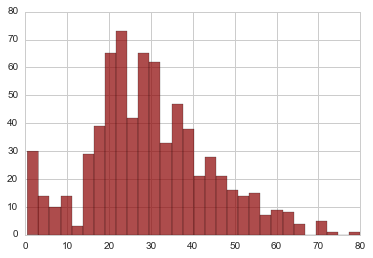

In [81]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

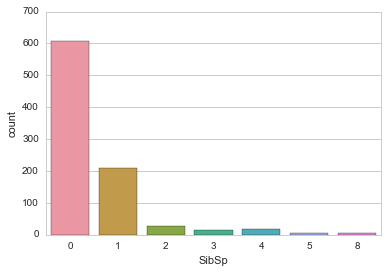

In [82]:
sns.countplot(x='SibSp',data=train)

The most people onboard did not have neither children or a spouse on board. And if we look at the second most popular option it's just one which is actually most likely to be probably a spouse versus just having a single parent when children onboard.

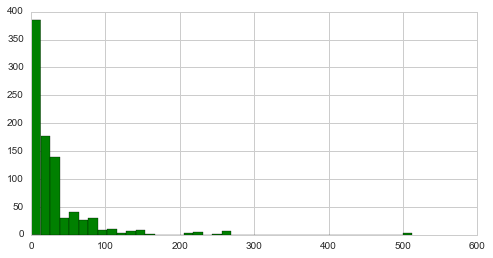

In [83]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

Most of the purchase prices are between 0 on a 50. So it makes sense that things are distributed towards the cheaper fare tickets because as we have already
seen most passengers are actually in the cheaper third class.


## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


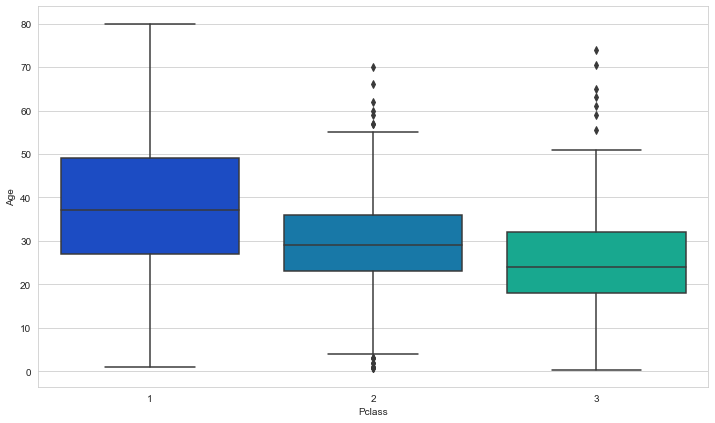

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [9]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

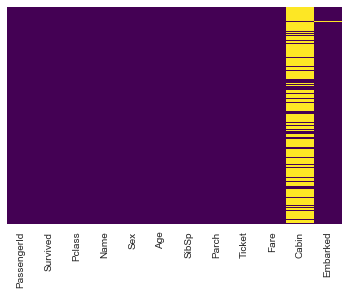

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The other issue is Cabing column! Since there's so much missing information here, it's just easier to go ahead and drop that cabin column.

In [11]:
train.drop('Cabin',axis=1,inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train.dropna(inplace=True)

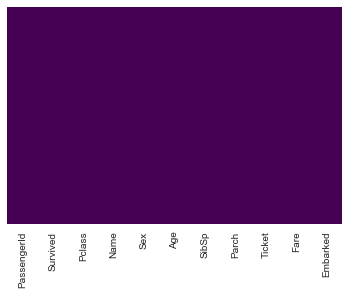

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values left! We are ready to move forward!

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


We converted the sex column into male and female with boolean category. Since a single column is enough to represent whether it is male or female, we can go ahead and drop the first column!

In [21]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


We can do a similar thing on Embarked column. After converting it to dataframe, we can see that 2 columns are enough to represent three information where Q=1, S=0 means Queenstown; Q=0, S=1 means Southampton; Q=0, S=0 means Cherbourg. So we can go ahead drop the first column and still have perfect numeric representation of Embarked column.

In [25]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


We can now create this as dataframe variables.

In [18]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

Then, add these columns into train dataframe

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


As you can see now we have numeric male column istead of sex and numeric Q and S columns (whichs is like 2 bit represenration) instead of Embarked column. So, we can now remove all string columns including Sex, Embarked, Name and Ticket columns since we don't need them! 

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


The last thing we can do is to remove PassgerId since we can identify Passenger Ids using index numbers in the data frame. So, this column is als redudant in the process.

In [30]:
train.drop(['PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

We will now create our input and output (label) data. Since our output that we want to classify is whether a passenger is survived or not, it will be survived column.
The rest of the columns will be our input (features). So we will drop Survived column at make it equal to X and pick survived column and make it equal to y.

In [6]:
X = train.drop('Survived',axis=1)
y = train['Survived']

NameError: name 'train' is not defined

Now we are ready to create Train and Test sets from this input (X) and output (y) data.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

NameError: name 'X' is not defined

## Training and Predicting

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
logmodel = LogisticRegression(max_iter=300)
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [8]:
predictions = logmodel.predict(X_test)

NameError: name 'X_test' is not defined

Let's move on to evaluate our model!

## Evaluation

Here you can see the confusion matrix with predicted and True values! 

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

We can check precision,recall,f1-score using classification report!

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



Here, 0 means Negative Class (not survived) and 1 means Positive Class (survived). 
From the confusion matrix:

Precision is $\frac{True Negative}{(Total Predicted Negative)}$ and $\frac{True Positive}{(Total Predicted Positive)}$

Recall is $\frac{True Negative}{(Total Actual Negative)}$ and $\frac{True Positive}{(Total Actual Positive)}$

f1-score is $\frac{2*Precision*Recall}{Precision+Recall}$ for both Negative and Positive Classes!

Support is Total Number of Actual Negative and Poisitive Classes.